# Test Yourk Installation

In [38]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.5.0'

In [39]:
keras.__version__

'2.5.0'

# Building an Image Classifier Using the Sequential API

First:
    1. we need to load a dataset.
    2. we will tackle the Fashion MNIST, which is a drop in replacement of MNIST.
    3. but the images represent fashion items rather than handritten digits.
    4. so each class is more diverse and the problem turns out to be significantly more challenging than MNIST.

In [40]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [41]:
X_train_full.shape

(60000, 28, 28)

In [42]:
X_train_full.dtype

dtype('uint8')

Note:
    1. the dataset is already split into a training set and a test set
    2. there is no validation set, so let's craete one

Moreover:
    1. since we are going to train the neural network using Gradient Descent.
    2. we must scale the input features.
    3. for the simplicity, we just scale the pixel intensities down to the 0- 1, range by dividing themby 255,
    4. this is also convert the floats.

In [55]:
from sklearn.model_selection import train_test_split

X_trian, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [59]:
X_train, X_valid = X_train / 255.0, X_valid / 255.0 #X_valid, X_train, range from 0 to 1

WIth:
    1. MNIST, when the label is equal to 5, it means that image represents the handwritten digit 5
    2. However, for Fashion MNIST, we need the list of class names to know what we are dealing with.

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

For example:
    1. the first image in the training set response a coat.

In [45]:
class_names[y_train[0]]

'Coat'

# Creating the Model Using the Sequential API

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
# display all the model's layers, None means batch size can be anything
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
#  fetch a layer by it's index
model.layers[1]

In [16]:
#  fetch a layer by it's name
model.get_layer('dense_2').name

'dense_2'

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[-0.01330298,  0.01623482, -0.06464295, ..., -0.02638816,
         0.02536875,  0.03286172],
       [ 0.03042108, -0.03566369,  0.01817931, ..., -0.06447882,
        -0.04660165,  0.01223708],
       [-0.0241818 , -0.05938692,  0.04832375, ...,  0.00160716,
         0.06783053, -0.01364114],
       ...,
       [-0.06256106,  0.05910307,  0.00945903, ..., -0.07301901,
         0.00769576, -0.06264027],
       [ 0.02287759,  0.05458528, -0.03168743, ..., -0.05016948,
         0.0280839 , -0.0034865 ],
       [-0.01046801,  0.0111837 , -0.06980243, ...,  0.07428327,
        -0.01388569, -0.01479949]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Compiling the Model

After the model is created:
    1. you must call it's compile(), method to specify the loss-function and the optimizer to use
    2. Optionally, you can also specify a list of extra metrics to compute during training and evaluation

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

First:
    1. we use the 'sparse_cagtegorical_crossentropy', loss
    2. becuase, we have sparse labels(for each instance there is just a target class index, from 0 to 9 in this case)
    3. and the classes are exclusive.
    4. if instead we had one target probability per class for each instance(such as one-hot vectors)
    5. then, we would need fication, (which is one, or more binary labels)
    6. then, we would use the 'sigmoid', (i,e logistic) activation function in the output layer instead of the 'softmax' activation function
    7. and we would use the 'binary_crossentropy', loss

Finally:
    1. since this is a classifier,
    2. it's useful to measure it's 'accuracy', during training and evaluation

# Training and Evaluation the Mdel

Keras:
    1. will measure the loss and the extra metrics on this set at the end of each epoch.
    2. which is very useful set to see how well the model really performs
    3. if the performance on the training set is much better on the validation set, your model is probably, # OVerfitting, the training set.
    4. Or, there's a bug, such as a data mismatch between the training set and the validaltion set.

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2219 - accuracy: 0.9198 - val_loss: 0.2938 - val_accuracy: 0.8966
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2189 - accuracy: 0.9202 - val_loss: 0.2863 - val_accuracy: 0.8958
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2147 - accuracy: 0.9219 - val_loss: 0.2904 - val_accuracy: 0.8964
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2103 - accuracy: 0.9239 - val_loss: 0.3069 - val_accuracy: 0.8896
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2073 - accuracy: 0.9241 - val_loss: 0.2895 - val_accuracy: 0.8934
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2038 - accuracy: 0.9263 - val_loss: 0.2909 - val_accuracy: 0.8948
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2002 - accuracy: 0.9275 - val_loss: 0.2902 - val_accuracy:

You can see:
    1. that the training  loss went down, which is a good sign
    2. and the validation accuracy is, 0.8952, after 50 epochs, not too far from the training accuracy, so there doesn't seem to be much overfitting going on

if the training set way very skewed:
    1. with some classes being overrepresented and others underrepresented,
    2. it would be useful to set the, class_weight, argument when calling the, fit(). method.
    3. giving a larger weight to underrepresented classes and a lower wight to overrepresented classes.
    4. These weights would be used by keras when computing the, loss.
    

If you need:
    1. pre-instance weights, instead, you can set the, sample_weight argument(it supersedes, class_weight)
    2. This could be useful for example if some instances were labeled by experts while others were labeled using a crowdsourcing platform:
        1. you might want to give more weight to the former.
        2. yoy can also provide sample weights(but not class weights), for the validation set by adding them as a third item inn the validation_data, tuplem

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

the fit(), method:
    1.returns a Histroy, object containing the training parameters(history.params)
    2. the list of, epochs it went through(history.epoch)
    3. and the most importantly a dictionary(history.history), containing the loss and extra metrics ti measured at the end of each epoch on the training set and on the validation set`

In [26]:
history.history

{'loss': [0.22189372777938843,
  0.21888545155525208,
  0.21473631262779236,
  0.2103496938943863,
  0.2072809338569641,
  0.20382043719291687,
  0.20020060241222382,
  0.1987149715423584,
  0.19488190114498138,
  0.19037964940071106,
  0.18856659531593323,
  0.18518243730068207,
  0.18229472637176514,
  0.17966434359550476,
  0.17639203369617462,
  0.17401063442230225,
  0.17131240665912628,
  0.1684844046831131,
  0.16532902419567108,
  0.16234396398067474,
  0.1608302742242813,
  0.15766488015651703,
  0.1554463654756546,
  0.15301232039928436,
  0.15006396174430847,
  0.14703308045864105,
  0.14527639746665955,
  0.14224383234977722,
  0.14121082425117493,
  0.13975737988948822],
 'accuracy': [0.9197999835014343,
  0.920236349105835,
  0.921854555606842,
  0.9238545298576355,
  0.9240545630455017,
  0.9262909293174744,
  0.927545428276062,
  0.9276182055473328,
  0.9300909042358398,
  0.9314000010490417,
  0.9309090971946716,
  0.9334545731544495,
  0.9343090653419495,
  0.93461817

# Learing Curves

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

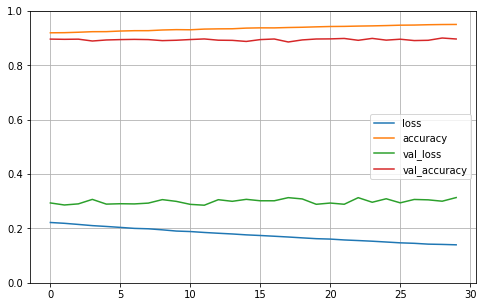

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)# Set the vertival range to [0-1]
plt.show()

You can see:
    1. The validation curves are quite close to the training curves, which means that there is not too much overfitting.

If you are not satisfied with the performance of your model:
    1. you should go back and tune the model's hyperparameters
    2. for example, the number of layers
    3. the number of neurons per layer
    4. the types of activation functions we use for each hidden layer.
    5. the number of training ebochs
    6. the batch size( it can be set in the fit() method using the batch-size, argument. which default to 32)

Once You are satisfied with your model's validationn accuracy:
    1. you should evaluate it on the test set to estimate the generalization error before you deploy the model to production.
    w. you can easily do this using the, evaluate(), method(it's supports several othe arguments, such as batch_size, or sample wieght, )

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 68.3327 - accuracy: 0.8603


[68.33267974853516, 0.8603000044822693]

As we saw in CH2:
    1. it's common to get slightly lower performance on the test set than the valiation set.
    2. because the hyperparameters are tunes on the validation set, not the test set.

# Using the Model to Make Prediction

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about:
    1. the class, with the highest estimation probability.
    2. even if that probability is quite low
    3. then you can use teh predict_classes(), method instead.

In [60]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\taimo\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 6, 6], dtype=int64)

In [61]:
import numpy as np

In [62]:
np.array(class_names)[y_pred]

array(['Shirt', 'Shirt', 'Shirt'], dtype='<U11')

In [63]:
model.save('my_keras_model.h5')

## Callbacks

but also save checkpoints at regular intervals during training by default at the end of each epoch
    <br>
this way you don't need to worry about training for too long and overfitting the training set    

In [64]:
model = keras.models.load_model('2. Building an Image Classifier Using the Sequential API.h5')

In [67]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("2. Building an Image Classifier Using the Sequential API.h5", save_best_only=True, patience=10)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('2. Building an Image Classifier Using the Sequential API.h5',)

Epoch 1/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3084 - accuracy: 0.1026 - val_loss: 2.2791 - val_accuracy: 0.0999
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3105 - accuracy: 0.1030 - val_loss: 2.2382 - val_accuracy: 0.2331
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3092 - accuracy: 0.1036 - val_loss: 2.2500 - val_accuracy: 0.1004
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3106 - accuracy: 0.0960 - val_loss: 2.2420 - val_accuracy: 0.2917
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3105 - accuracy: 0.0900 - val_loss: 2.2420 - val_accuracy: 0.2296
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3089 - accuracy: 0.0970 - val_loss: 2.2473 - val_accuracy: 0.1030
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3108 - accuracy: 0.1008 - val_loss: 2.2437 - val_accuracy: 0.3471

Epoch 58/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3090 - accuracy: 0.0908 - val_loss: 2.2396 - val_accuracy: 0.3080
Epoch 59/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3098 - accuracy: 0.0990 - val_loss: 2.2422 - val_accuracy: 0.2906
Epoch 60/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3081 - accuracy: 0.1054 - val_loss: 2.2439 - val_accuracy: 0.2111
Epoch 61/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3059 - accuracy: 0.1096 - val_loss: 2.2481 - val_accuracy: 0.1319
Epoch 62/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3095 - accuracy: 0.0982 - val_loss: 2.2412 - val_accuracy: 0.3024
Epoch 63/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3076 - accuracy: 0.1016 - val_loss: 2.2417 - val_accuracy: 0.1887
Epoch 64/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3082 - accuracy: 0.1000 - val_loss: 2.2447 - val_accuracy:

## Fune Tuning NN

In [68]:
from scipy import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [75]:
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
}

rnd_search_cv = RandomizedSearchCV(history, param_distribs, n_iter=10, cv=3)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3094 - accuracy: 0.1000 - val_loss: 2.2428 - val_accuracy: 0.1771
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3093 - accuracy: 0.1006 - val_loss: 2.2423 - val_accuracy: 0.2833
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3082 - accuracy: 0.0960 - val_loss: 2.2454 - val_accuracy: 0.0990
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3101 - accuracy: 0.0970 - val_loss: 2.2503 - val_accuracy: 0.1026
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3102 - accuracy: 0.1000 - val_loss: 2.2635 - val_accuracy: 0.1004
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3092 - accuracy: 0.1074 - val_loss: 2.2519 - val_accuracy: 0.0999
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3094 - accuracy: 0.0972 - val_loss: 2.2467 - val_accuracy: 0.2034

Epoch 58/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3086 - accuracy: 0.1022 - val_loss: 2.2507 - val_accuracy: 0.3014
Epoch 59/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3090 - accuracy: 0.0906 - val_loss: 2.2410 - val_accuracy: 0.2801
Epoch 60/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3080 - accuracy: 0.1002 - val_loss: 2.2450 - val_accuracy: 0.1580
Epoch 61/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3082 - accuracy: 0.0984 - val_loss: 2.2448 - val_accuracy: 0.1860
Epoch 62/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3094 - accuracy: 0.0972 - val_loss: 2.2421 - val_accuracy: 0.2277
Epoch 63/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3082 - accuracy: 0.1066 - val_loss: 2.2488 - val_accuracy: 0.2011
Epoch 64/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3090 - accuracy: 0.1006 - val_loss: 2.2439 - val_accuracy:

In [77]:
model.save('2. history.h5')

In [79]:
history.best_params_

AttributeError: 'History' object has no attribute 'best_params_'